#Juan Carlos Apitz
#STAT510 Homework 2

####Required Python Modules:

In [98]:
#PANDAS
import pandas as pd
from pandas import DataFrame, Series

#NUMPY
import numpy as np

#SCIPY t distribution
from scipy.stats import t

#STATMODELS
import statsmodels.formula.api as sm

#SEABORN plotting
import seaborn as sns

#MATPLOTLIB plotting
import matplotlib.pyplot as plt
%matplotlib inline

##Problem 1.3

##Problem 1.22

First load the data set for the plastic hardness data

In [99]:
df = pd.read_table('~/Documents/LinearRegression/STAT510/Kutner/CH1DS/CH01PR22.txt',
                   delim_whitespace=True, names=['hardness','hours'])

In [100]:
df.head()

,hardness,hours
0,199,16
1,205,16
2,196,16
3,200,16
4,218,24


Next we fit the model

In [101]:
model = sm.ols(formula="hardness ~ hours", data=df).fit()

b0 = model.params[0]
b1 = model.params[1]
n = len(df)

###Part a.

The table below summarizes the results of fitting the model to plastic hardness data:

In [102]:
print model.summary()

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     506.5
Date:                Sun, 20 Sep 2015   Prob (F-statistic):           2.16e-12
Time:                        23:38:56   Log-Likelihood:                -40.414
No. Observations:                  16   AIC:                             84.83
Df Residuals:                      14   BIC:                             86.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    168.6000      2.657     63.454      0.0

#####The estimated regression function is:

$\hat{y} = 168.6 + 2.0344x$

Where $\hat{y}$ represents the estimated hardness and $x$ represents the elapsed time in hours.

#####Plot of the estimated regression function and the data:

The plot indicates that the data fits reasonably well the linear model represented by the regression function.

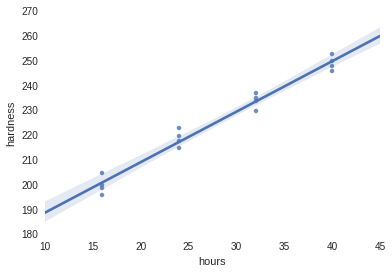

In [103]:
ax = sns.regplot(x="hours", y="hardness", data=df)

###Part b.

To obtain a point estimate of the mean hardness when X = 40 hours, we simply let X = 40 be the input into the estimated regression function:

In [104]:
x = DataFrame({'hours':40}, index = range(1))

print model.predict(x)[0]

249.975


###Part c.

The point estimate of the change in mean hadness when X is increased by one hour is simply the estimated coefficient for the X variable (hours) from the estimated regression function:

In [105]:
print model.params['hours']

2.034375


##Problem 1.26

###Part a.

Obtain resisuals and check wether the sum adds to 0:

In [106]:
model.resid

0    -2.150
1     3.850
2    -5.150
3    -1.150
4     0.575
5     2.575
6    -2.425
7     5.575
8     3.300
9     0.300
10    1.300
11   -3.700
12    0.025
13   -1.975
14    3.025
15   -3.975
dtype: float64

Below we can see that the sum of the residuals is nearly zero:

In [107]:
print sum(model.resid)

4.54747350886e-13


###Part b.

A point estimate of the variance is given by:
$$\hat{\sigma}^2 = \frac{\sum \left( y_i - \hat{y}_i \right)^2}{n-2}$$

The point estimate of the variance is calculated below:

In [108]:
variance = sum(model.resid**2)/(n-2)

print variance

10.4589285714


The estimate for sigma is given by:

$$\hat{\sigma} = \sqrt{\frac{\sum \left( y_i - \hat{y}_i \right)^2}{n-2}}$$

Sigma is expressed in Brinell units and is calculated below:

In [109]:
stdev = np.sqrt(variance)

print stdev

3.23402668069


##Problem 1.31

##Question 2

To show $\sum K_i^2 = \frac{1}{S_{xx}}$ we recognize that:

$$K_i^2 = \frac{\left(x_i-\bar{x}\right)^2}{\left(S_{xx}\right)^2}$$

then:

$$\sum K_i^2 = \sum \frac{\left(x_i-\bar{x}\right)^2}{\left(S_{xx}\right)^2}$$

$$ = \frac{1}{\left(S_{xx}\right)^2}\sum \left(x_i - \bar{x}\right)^2$$

$$ = \frac{S_{xx}}{\left(S_{xx}\right)^2}$$

$$ = \frac{1}{S_{xx}}$$

##Question 3

$$b_0 = \bar{Y} - b_1\bar{X}$$

$$V\left(b_0\right) = V\left(\bar{Y} - b_1\bar{X}\right)$$

$$ = V\left(\bar{Y}\right) - 2 \bar{X}Cov\left(\bar{Y},b_1\right)+ \bar{X}^2 V\left(b_1\right)$$

$$ = \frac{\sigma^2}{n} - 2 \bar{X}Cov\left(\bar{Y},b_1\right)+ \bar{X}^2 \frac{\sigma^2}{S_{xx}}$$

$$\text{since }Cov\left(\bar{Y},b_1\right) = 0 \text{ by independence of the }Y_i \text{ then:}$$

$$ V\left(b_0\right) = \frac{\sigma^2}{n} + \bar{X}^2 \frac{ \sigma^2}{S_{xx}}$$

$$ = \sigma^2 \left[\frac{1}{n} + \frac{\bar{X}^2}{S_{xx}}\right]$$

##Problem 2.7

We can calculate the standard error of the $b_1$ coefficient or read it of the summary table.

$$SE(b_1)=\frac{\hat{\sigma}}{\sqrt{\sum\left(x_i - \bar{x}\right)^2}}$$

In [110]:
stderr_b1 = np.sqrt(variance/sum((df['hours']-np.mean(df['hours']))**2))

print stderr_b1

0.0903937937384


###Part a.

Now we obtain the critical value $t_{\alpha/2,n-2}$ by finding the inverse $\alpha/2=CDF = 0.005$ value from the t-distribution with $14$ degrees of freedom:

In [111]:
tcrit = abs(t.ppf(0.005, n-2, loc=0, scale=1))

print tcrit

2.97684273411


Now we can construct an 99% interval for $b_1$. This interval is given by:

$$b_1 \pm t_{0.005,14}SE(b_1)$$

In [112]:
CI_99 = [b1-tcrit*stderr_b1, b1+tcrit*stderr_b1]

print CI_99

[1.7652868919008251, 2.3034631080991628]


###Part b.

The hypothesis test is as follows:

$H_o: \beta_1 = 2$

$H_a: \beta_1 \neq 2$

The decision rule is that if $\left|t_{stat}\right|>\left|t_{0.005,14}\right|$, we would reject the null hypothesis $H_o$ and fail to reject $H_o$ otherwise. We calculate $t_{stat}$ below:

$$t_{stat}=\frac{b_1-\beta_1^{null}}{SE(b_1)}\approx\frac{2.03-2}{0.09}\approx 0.38$$

A better approximation is computed below:

In [113]:
beta_null = 2

tstat = (b1-beta_null)/stderr_b1

print tstat

0.380280532306


Since $\left|t_{stat}\right|<\left|t_{0.005,14}\right| = 2.9768427$ we fail to reject $H_o$.

The p-value is given below:

In [114]:
pval = 2*(1-t.cdf(tstat,n-2))

print pval

0.70944445577


###Part c.

Since the standard is being exceeded by 0.3 Brinell, that means $\beta_1 - \beta_1^{null} = 0.3$, then the actual parameter $\beta_1 = 2.3$. To calculate the power of the test when $\beta_1 = 2.3$, we need to calculate $1-P\left(t_{stat} \not\in RR\ |\  \beta_1 = 2.3 \right)$, where $RR$ is the rejection region of the test from part b). This is the power of the test.

From part b) we know the rejection region is:

$$RR = \left\{ \left|\frac{b_1-\beta_1^{null}}{SE\left(b_1\right)}\right| > t_{crit} \right\}$$

$$ = \left\{ b_1 > \beta_1^{null}+t_{crit}SE\left(b_1\right) \text{ or } b_1 < \beta_1^{null}-t_{crit}SE\left(b_1\right) \right\}$$

Therefore:

$$P\left(t_{stat} \not\in RR\ |\  \beta_1 \right) = P\left( \beta_1^{null}-t_{crit}SE\left(b_1\right) < b_1 < \beta_1^{null}+t_{crit}SE\left(b_1\right) \ \big|\  \beta_1 \right)$$

and:

$$Power(\beta_1) = 1 - P\left( \beta_1^{null}-t_{crit}SE\left(b_1\right) < b_1 < \beta_1^{null}+t_{crit}SE\left(b_1\right) \ \bigr|\  \beta_1 \right)$$

$$ = 1 - P\left( \frac{\beta_1^{null}-\beta_1-t_{crit}SE\left(b_1\right)}{\sigma\{b_1\}} < t < \frac{\beta_1^{null}-\beta_1+t_{crit}SE\left(b_1\right)}{\sigma\{b_1\}} \ \biggr|\  \beta_1 \right)$$

Below we perform the power calculations for $\alpha  = 0.01$ and $t_{crit}=t_{0.005,14}=2.9768427$:

In [115]:
beta1 = 2.3

sigma_b1 = 0.1

tleft = (beta_null - beta1 - tcrit * stderr_b1)/sigma_b1

tright = (beta_null - beta1 + tcrit * stderr_b1)/sigma_b1

pType_2err = t.cdf(tright,n-2) - t.cdf(tleft,n-2)

power = 1 - pType_2err

print power

0.619136082084


Hence $Power(\beta_1=2.3)=0.619136$ for $\alpha = 0.01$.

##Problem 2.16

###Part a.

First calculate $\bar{X}$ and $S_{xx}$:

In [116]:
X = df.loc[:,'hours']

Xh = DataFrame({'hours':30}, index = range(1))

Xbar = np.mean(X)

Sxx = np.sum((X - Xbar)**2)

In [117]:
print Xbar

28.0


In [118]:
print Sxx

1280.0


$\hat{Y}$ is given from the model:

In [119]:
yhat = model.predict(Xh)[0]

print yhat

229.63125


Then we find the MSE of the model and calculate the standard error of $\hat{Y}$:

In [120]:
MSE = model.mse_resid

print MSE

10.4589285714


The standard error of $\hat{Y}$ is approximated by:

$$S\left(\hat{Y}\right) = \sqrt{MSE\left[\frac{1}{n} + \frac{\left(X_h - \bar{X}\right)^2}{S_{xx}}\right]}$$

which we calculate below:

In [121]:
var_yhat = MSE * ((1/ n) + ((Xh - Xbar)**2)/Sxx).loc[0,'hours']

stderr_yhat = np.sqrt(var_yhat)

print stderr_yhat

0.180787587477


The $98\%$ confidence interval is given by $\hat{Y}\pm t_{0.01,14}\ \ S\left(\hat{Y}\right)$ and is calculated below:

In [122]:
tcrit = abs(t.ppf(0.01, n-2, loc=0, scale=1))

CI_98 = [yhat-tcrit*stderr_yhat, yhat+tcrit*stderr_yhat]

print CI_98

[229.15677404917835, 230.10572595082158]


###Part b.

Here the calculations are similar to part a. above, except that for the prediction interval we use the following standard error:

$$S\left(predict\right) = \sqrt{MSE\left[1+\frac{1}{n} + \frac{\left(X_h - \bar{X}\right)^2}{S_{xx}}\right]}$$

which we calculate below:

In [123]:
var_pred = MSE * (1 + (1/ n) + ((Xh - Xbar)**2)/Sxx).loc[0,'hours']

stderr_pred = np.sqrt(var_pred)

print stderr_pred

3.23907590575


The $98\%$ confidence interval is given by $\hat{Y}_{predict}\pm t_{0.01,14}\ \ S\left(predict\right)$ and is calculated below:

In [124]:
CI_98_pred = [yhat-tcrit*stderr_pred, yhat+tcrit*stderr_pred]

print CI_98_pred

[221.13031450098015, 238.13218549901978]


##Problem 2.26

###Part a.

###Part b.